In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv("hatespeech_data.csv")

In [46]:
df


,Tweets,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
750897,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
750898,!!! RT @mayasolovely: As a woman you shouldn't...,2
750899,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
750900,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1


In [47]:
df["Labels"] = df['Label'].map({0: "Hate speech" , 1: "offensive language", 2: "Normal"})

In [48]:
df

,Tweets,Label,Labels
0,denial of normal the con be asked to comment o...,1,offensive language
1,just by being able to tweet this insufferable ...,1,offensive language
2,that is retarded you too cute to be single tha...,1,offensive language
3,thought of a real badass mongol style declarat...,1,offensive language
4,afro american basho,1,offensive language
...,...,...,...
750897,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,offensive language
750898,!!! RT @mayasolovely: As a woman you shouldn't...,2,Normal
750899,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,offensive language
750900,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,offensive language


In [49]:
df.rename(columns={"Label": "class"}, inplace=True)

In [50]:
df

,Tweets,class,Labels
0,denial of normal the con be asked to comment o...,1,offensive language
1,just by being able to tweet this insufferable ...,1,offensive language
2,that is retarded you too cute to be single tha...,1,offensive language
3,thought of a real badass mongol style declarat...,1,offensive language
4,afro american basho,1,offensive language
...,...,...,...
750897,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,offensive language
750898,!!! RT @mayasolovely: As a woman you shouldn't...,2,Normal
750899,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,offensive language
750900,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,offensive language


In [51]:
df = df[["Tweets" , "Labels"]]

In [52]:
df

,Tweets,Labels
0,denial of normal the con be asked to comment o...,offensive language
1,just by being able to tweet this insufferable ...,offensive language
2,that is retarded you too cute to be single tha...,offensive language
3,thought of a real badass mongol style declarat...,offensive language
4,afro american basho,offensive language
...,...,...
750897,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
750898,!!! RT @mayasolovely: As a woman you shouldn't...,Normal
750899,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
750900,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language


In [53]:
print(df.head())

                                              Tweets              Labels
0  denial of normal the con be asked to comment o...  offensive language
1  just by being able to tweet this insufferable ...  offensive language
2  that is retarded you too cute to be single tha...  offensive language
3  thought of a real badass mongol style declarat...  offensive language
4                                afro american basho  offensive language


In [54]:
import nltk
import re
import string

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
#Import stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [57]:
#Import Stemming
stemmer = nltk.SnowballStemmer("english")

In [58]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
#removing stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text = ' '.join(text)
#applying stemming
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text

In [59]:
df.loc[:, 'Tweets'] = df['Tweets'].apply(clean)

In [60]:
df

,Tweets,Labels
0,denial normal con ask comment tragedi emot retard,offensive language
1,abl tweet insuffer bullshit prove trump nazi v...,offensive language
2,retard cute singl life,offensive language
3,thought real badass mongol style declar war at...,offensive language
4,afro american basho,offensive language
...,...,...
750897,yous muthafin lie coreyemanuel right tl tras...,offensive language
750898,rt mayasolov woman shouldnt complain clean ho...,Normal
750899,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive language
750900,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive language


In [61]:
# creating arrays to represent tweets and labels to split data
x = np.array(df['Tweets'])
y = np.array(df['Labels'])

In [62]:
x

array(['denial normal con ask comment tragedi emot retard',
       'abl tweet insuffer bullshit prove trump nazi vagina',
       'retard cute singl life', ...,
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ' rt cganderson vivabas look like tranni'], dtype=object)

In [63]:
y

array(['offensive language', 'offensive language', 'offensive language',
       ..., 'offensive language', 'offensive language', 'Normal'],
      dtype=object)

In [64]:
#Buliding up ML Model 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=42)

# Vectorize text data using CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [66]:
X_train

<510613x100970 sparse matrix of type '<class 'numpy.int64'>'
	with 8062878 stored elements in Compressed Sparse Row format>

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Model training successful!")

Model training successful!


In [68]:
y_pred = dtc.predict(X_test)

In [69]:
#validating using confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)

In [70]:
conf_matrix

array([[91532,   379, 23952],
       [  573,   541,   221],
       [23081,   157, 99853]], dtype=int64)

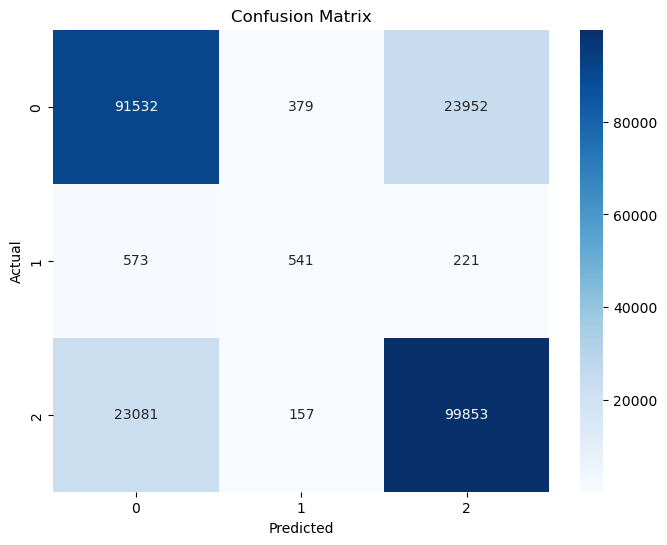

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7987298627902234

In [73]:
# Predicting on new data from CSV file
new_df = pd.read_csv('labeled_data.csv')


In [74]:
new_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [75]:
new_df['tweet'] = new_df['tweet'].apply(clean)
new_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [77]:
new_X = cv.transform(new_df['tweet'])  # Keep it sparse
new_predictions = dtc.predict(new_X)
new_X

<24783x100970 sparse matrix of type '<class 'numpy.int64'>'
	with 193794 stored elements in Compressed Sparse Row format>

In [78]:
# Display the predictions
new_df['Prediction'] = new_predictions
print(new_df[['tweet', 'Prediction']])

                                                   tweet          Prediction
0       rt mayasolov woman shouldnt complain clean ho...              Normal
1       rt  boy dat coldtyga dwn bad cuffin dat hoe  ...  offensive language
2       rt urkindofbrand dawg rt  ever fuck bitch sta...  offensive language
3                 rt cganderson vivabas look like tranni  offensive language
4       rt shenikarobert shit hear might true might f...  offensive language
...                                                  ...                 ...
24778  yous muthafin lie   coreyemanuel right tl tras...  offensive language
24779  youv gone broke wrong heart babi drove redneck...  offensive language
24780  young buck wanna eat dat nigguh like aint fuck...         Hate speech
24781                     youu got wild bitch tellin lie         Hate speech
24782  ruffl  ntac eileen dahlia  beauti color combin...         Hate speech

[24783 rows x 2 columns]


In [79]:
#checking as per the prerequistie vedio
sample ="Lets unite and kill all the people who are protestingagainst the government"
sample = clean(sample)
sample

'let unit kill peopl protestingagainst govern'

In [80]:
d1 = cv.transform([sample]).toarray()
d1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
dtc.predict(d1)

array(['offensive language'], dtype=object)